In [5]:
import math
import numpy as np
import random
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
goal_state = 500
size_of_maze = 1000
episodes = 1000
discount = 0.99
alpha = 0.2
e_soft = 0.1

n = 8192
mean = 0
sigma = 1 / math.sqrt(n)

inputs = n
ouputs = 1

reward_bad = -1
reward_good = 0

In [ ]:
state_hrrs = np.random.normal(mean, sigma, size=[size_of_maze, n])

In [6]:
def find_goal(state_hrr, start_location):
    state = start_location
    steps = 0
    while(state != goal_state):
        if(state == 0):
            decision = policy(nn.feedforward(state_hrrs[size_of_maze-1]), nn.feedforward(state_hrrs[state+1]), 0)
            if(decision == -1):
                state = size_of_maze-1
            else:
                state = state + decision
        elif(state == size_of_maze - 1):
            decision = policy(nn.feedforward(state_hrrs[state-1]), nn.feedforward(state_hrrs[0]), 0)
            if(decision == -1):
                state = state + decision
            else:
                state_prime = state
                state = 0
        else:
            decision = policy(nn.feedforward(state_hrrs[state-1]), nn.feedforward(state_hrrs[state+1]), 0)
            state = state + decision
        steps += 1
    return steps

In [7]:
class NeuralNetwork:
    def __init__(self, inputs, outputs, discount, alpha):
        self.discount = discount
        self.alpha = alpha
        self.input = inputs
        self.output = outputs
        self.weights = np.random.randn(outputs, inputs)
        self.bias = 1
        
    def feedforward(self, X):
        self.output = np.dot(self.weights, X) + self.bias
        return self.output
    
    def backprop(self, state_prime_hrr, state_hrr, y):
        self.error = (y + self.discount * self.feedforward(state_hrr)) - self.feedforward(state_prime_hrr)
        self.weights = np.add(self.weights, (self.alpha * self.error * state_prime_hrr))

In [8]:
def policy(a, b, rand_on):
    if((np.random.random() < e_soft) and (rand_on == 1)):
        return np.random.choice([-1, 1])
    if(a > b):
        return -1
    elif (b > a):
        return 1
    else:
        return np.random.choice([-1, 1])

In [10]:
nn = NeuralNetwork(n, 1, discount, alpha)
state = random.randint(0, size_of_maze - 1)
state_prime = state

for x in range(episodes):
        while(state != goal_state):
            if(state == 0):
                decision = policy(nn.feedforward(state_hrrs[size_of_maze-1]), nn.feedforward(state_hrrs[state+1]), 1)
                if(decision == -1):
                    state_prime = state
                    state = size_of_maze-1
                else:
                    state_prime = state
                    state = state + decision
            elif(state == size_of_maze - 1):
                decision = policy(nn.feedforward(state_hrrs[state-1]), nn.feedforward(state_hrrs[0]), 1)
                if(decision == -1):
                    state_prime = state
                    state = state + decision
                else:
                    state_prime = state
                    state = 0
            else:
                decision = policy(nn.feedforward(state_hrrs[state-1]), nn.feedforward(state_hrrs[state+1]), 1)
                state_prime = state
                state = state + decision
            nn.backprop(state_hrrs[state_prime], state_hrrs[state], reward_bad)
        nn.backprop(state_hrrs[state_prime], state_hrrs[state], reward_good)
        state = random.randint(0, size_of_maze - 1)
        state_prime = state
        print("Episode", x+1, "done")
           

Episode 1 done
Episode 2 done
Episode 3 done
Episode 4 done
Episode 5 done
Episode 6 done
Episode 7 done
Episode 8 done
Episode 9 done
Episode 10 done
Episode 11 done
Episode 12 done
Episode 13 done
Episode 14 done
Episode 15 done
Episode 16 done
Episode 17 done
Episode 18 done
Episode 19 done
Episode 20 done
Episode 21 done
Episode 22 done
Episode 23 done
Episode 24 done
Episode 25 done
Episode 26 done
Episode 27 done
Episode 28 done
Episode 29 done
Episode 30 done
Episode 31 done
Episode 32 done
Episode 33 done
Episode 34 done
Episode 35 done
Episode 36 done
Episode 37 done
Episode 38 done
Episode 39 done
Episode 40 done
Episode 41 done
Episode 42 done
Episode 43 done
Episode 44 done
Episode 45 done
Episode 46 done
Episode 47 done
Episode 48 done
Episode 49 done
Episode 50 done
Episode 51 done
Episode 52 done
Episode 53 done
Episode 54 done
Episode 55 done
Episode 56 done
Episode 57 done
Episode 58 done
Episode 59 done
Episode 60 done
Episode 61 done
Episode 62 done
Episode 63 done
E

Episode 496 done
Episode 497 done
Episode 498 done
Episode 499 done
Episode 500 done
Episode 501 done
Episode 502 done
Episode 503 done
Episode 504 done
Episode 505 done
Episode 506 done
Episode 507 done
Episode 508 done
Episode 509 done
Episode 510 done
Episode 511 done
Episode 512 done
Episode 513 done
Episode 514 done
Episode 515 done
Episode 516 done
Episode 517 done
Episode 518 done
Episode 519 done
Episode 520 done
Episode 521 done
Episode 522 done
Episode 523 done
Episode 524 done
Episode 525 done
Episode 526 done
Episode 527 done
Episode 528 done
Episode 529 done
Episode 530 done
Episode 531 done
Episode 532 done
Episode 533 done
Episode 534 done
Episode 535 done
Episode 536 done
Episode 537 done
Episode 538 done
Episode 539 done
Episode 540 done
Episode 541 done
Episode 542 done
Episode 543 done
Episode 544 done
Episode 545 done
Episode 546 done
Episode 547 done
Episode 548 done
Episode 549 done
Episode 550 done
Episode 551 done
Episode 552 done
Episode 553 done
Episode 554 do

Episode 978 done
Episode 979 done
Episode 980 done
Episode 981 done
Episode 982 done
Episode 983 done
Episode 984 done
Episode 985 done
Episode 986 done
Episode 987 done
Episode 988 done
Episode 989 done
Episode 990 done
Episode 991 done
Episode 992 done
Episode 993 done
Episode 994 done
Episode 995 done
Episode 996 done
Episode 997 done
Episode 998 done
Episode 999 done
Episode 1000 done


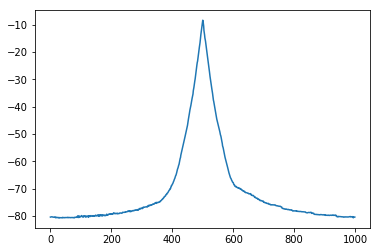

In [11]:
value = np.zeros(size_of_maze)
for x in range(size_of_maze):
    value[x] = nn.feedforward(state_hrrs[x])
position = np.arange(size_of_maze)
plt.plot(position, value)

In [12]:
find_goal(state_hrrs[400], 400)

100